# Combinando datos con Pandas

Datos : http://datos.gob.ar/dataset/siep-indicadores-sectoriales-acero

Link util : https://pandas.pydata.org/pandas-docs/stable/merging.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

In [2]:
expo = pd.read_csv(r'C:\Users\avelazquez\Downloads\acero-exportaciones-series.csv')
impo = pd.read_csv(r'C:\Users\avelazquez\Downloads\acero-importaciones-series.csv')
prod = pd.read_csv(r'C:\Users\avelazquez\Downloads\acero-produccion-series.csv')
consumo = pd.read_csv(r'C:\Users\avelazquez\Downloads\acero-consumo-series.csv')

In [3]:
prod.head()

,indice_tiempo,acero_produccion
0,1993-01-01,214500
1,1993-02-01,169000
2,1993-03-01,238700
3,1993-04-01,250200
4,1993-05-01,261200


In [4]:
impo.head()

,indice_tiempo,acero_importaciones_acero,acero_importaciones_barras,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos,acero_importaciones_rieles,acero_importaciones_tubos_con_costura,acero_importaciones_tubos_sin_costura
0,1992-01-01,0,0.0,17.7,259.9,0.1,4.0,1.1
1,1992-04-01,0,0.0,19.4,246.8,0.0,1.2,3.1
2,1992-07-01,0,0.0,24.9,228.7,0.1,3.2,1.8
3,1992-10-01,0,0.0,25.5,174.6,0.1,4.1,1.2
4,1993-01-01,0,0.0,20.8,112.9,0.0,2.1,1.0


In [5]:
# Existe una diferencia en unidades, la produccion esta en toneladas y las importaciones en miles de toneladas
# Transformamos los datos...
prod.acero_produccion = 

In [6]:
prod.head()

,indice_tiempo,acero_produccion
0,1993-01-01,214.5
1,1993-02-01,169.0
2,1993-03-01,238.7
3,1993-04-01,250.2
4,1993-05-01,261.2


In [7]:
#Unificamos los datos para tener mediciones por año
expo.indice_tiempo = pd.to_datetime(...) # transformamos los datos
expo['year'] = [...].dt.year #creamos una nueva columna
expo.head()

,indice_tiempo,acero_exportaciones_acero,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_exportaciones_rieles,acero_exportaciones_tubos_con_costura,acero_exportaciones_tubos_sin_costura,year
0,1992-01-01,0.0,4.1,31.4,10.8,3.8,109.3,1992
1,1992-04-01,0.0,25.1,57.5,20.5,1.6,125.8,1992
2,1992-07-01,0.0,21.7,69.8,28.6,1.4,61.8,1992
3,1992-10-01,0.0,10.1,65.2,14.8,4.3,173.9,1992
4,1993-01-01,0.0,19.1,136.9,1.4,7.0,105.5,1993


In [8]:
#Vamos a trabajar unicamente de aceros laminados 
#Sumamos la cantidad de exportaciones por año
expo_by_year = expo.groupby([...])[... , ...]...()
expo_by_year.head()

,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos
year,,
1992,61.0,223.9
1993,99.5,269.6
1994,161.3,295.2
1995,258.8,559.3
1996,226.4,457.4


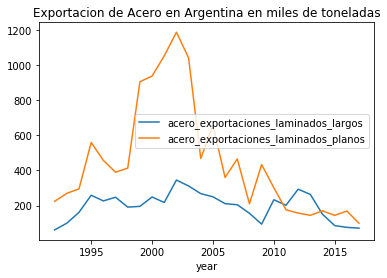

In [9]:
expo_by_year.plot(title = "Exportacion de Acero en Argentina en miles de toneladas" )

In [10]:
#Hacemos lo mismo con las importaciones ahora
impo.indice_tiempo = 
impo['year'] = 

In [11]:
impo_by_year = 
impo_by_year.head()

,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos
year,,
1992,87.5,910.0
1993,113.8,388.7
1994,130.6,371.6
1995,96.5,321.1
1996,155.7,351.3


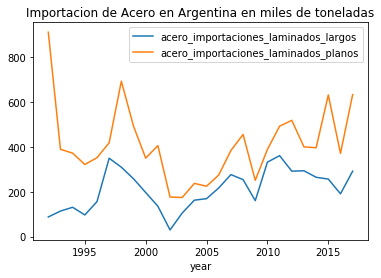

In [12]:
#Graficamos
impo_by_year.plot(title = "Importacion de Acero en Argentina en miles de toneladas")

### Como hacemos si queremos tener todos los datos en un mismo grafico?
### pandas concat!
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html

In [13]:
expo_and_impo_by_year = pd.concat([expo_by_year,impo_by_year], axis = ??,  join = "??" , ignore_index = ??) #inner or outer join?
expo_and_impo_by_year.head(40)

,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos
year,,,,
1992,61.0,223.9,87.5,910.0
1993,99.5,269.6,113.8,388.7
1994,161.3,295.2,130.6,371.6
1995,258.8,559.3,96.5,321.1
1996,226.4,457.4,155.7,351.3
1997,247.2,390.0,349.1,418.1
1998,191.0,413.2,309.1,692.0
1999,195.2,905.4,257.6,491.8
2000,248.8,938.3,196.3,349.5


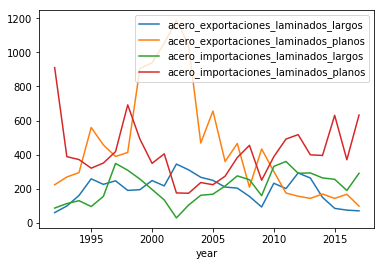

In [14]:
expo_and_impo_by_year.plot()

### Opcion axis y join 

Hay dos fomas de concatenar una por las columnas (axis = 1) y otra por las filas (axis = 0), por default es cero, que pasa si cambiamos ese valor?

![Axis diagram](https://www.dataquest.io/blog/content/images/2017/12/axis_diagram.jpg)

Al igual que en bases de datos ralacionales (ejemplo: SQL), Pandas tiene la opcion de realizar merge y join.
    - Joins solo puede realizarse de a dos tablas.
    - Concat va a funcionar cuando tenemos tablas de la misma altura (numero de filas)
    - "Key" es la columna que tienen en comun.
    - Con pd.concat podemos usar inner o outer join
    - Existen 4 tipos de join:  

![Inner join](https://www.dataquest.io/blog/content/images/2017/12/inner-join.png)
![Left join](https://www.dataquest.io/blog/content/images/2017/12/left-join.png)
![Right join](https://www.dataquest.io/blog/content/images/2017/12/right-join.png)
![Full outer join](https://www.dataquest.io/blog/content/images/2017/12/full-outer-join.png)


### Ahora vamos a sumarle nuestros datos de Produccion 

In [15]:
# Modificamos nuestro data-set de produccion para tenerlo de la misma forma que IMPO o EXPO
prod.indice_tiempo =   #transformamos a unidad de tiempo
prod['year'] =         #creamos una nueva columna
prod_by_year = [...].to_frame() #sumamos la produccion por cada año
prod_by_year.head(50) # Este data-set incluye datos del 2018!

,acero_produccion
year,
1993,2885.40
1994,3305.00
1995,3568.50
1996,4075.10
1997,4169.87
1998,4215.40
1999,3804.70
2000,4479.22
2001,4108.00


In [16]:
#Unimos los dos datasets
expo_impo_prod_by_year = pd.merge([...], [...], how='???',left_index = ??,  right_index = ??)
expo_impo_prod_by_year.head(40)

,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos,acero_produccion
year,,,,,
1992,61.0,223.9,87.5,910.0,NaN
1993,99.5,269.6,113.8,388.7,2885.40
1994,161.3,295.2,130.6,371.6,3305.00
1995,258.8,559.3,96.5,321.1,3568.50
1996,226.4,457.4,155.7,351.3,4075.10
1997,247.2,390.0,349.1,418.1,4169.87
1998,191.0,413.2,309.1,692.0,4215.40
1999,195.2,905.4,257.6,491.8,3804.70
2000,248.8,938.3,196.3,349.5,4479.22


### Otra forma de usar merge es con el comando join directamente

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html

### En caso de querer agregar mas filas en data-sets similares podemos utilizar pd.append

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html

### Para cerrar...

pd.concat() function: multiproposito y puede ser usado para combinar data-sets por filas o columnas 

DataFrame.append() method: un metodo rapido para agregar filas pero no columnas!

pd.merge() function: util cuando tenemos que unir data-sets con una columna en comun (key) 

DataFrame.join() method: metodo rapido para hacer join pero solo por index (podriamos haberlo usada aca)

### Tarea... (?)

1- Unir el data-set de consumo al ultimo creado para poder graficar todo junto. (tener en cuenta las columnas usadas)

2- Obtener un data-set a partir del punto 1 con cuatro columnas correspondientes a EXPO, IMPO, PROD y CONSUM.

        (Puedo sumar columnas a = b + c y crear un DF, puedo usar pd.sum() o crear columnas y luego hacer drop)
        
3- Graficar el data-set del punto 2 con la libreria sea-born y editando titulos, leyendas, colores, etc. 


### Preguntas ? 



![Axis diagram](https://i.pinimg.com/originals/ec/bf/1c/ecbf1c0337f0623160ac56c89d64d601.jpg)